In [0]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances
import random



x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)



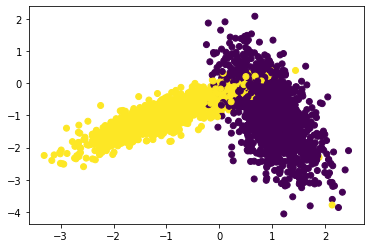

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = {0:'red', 1:'blue'}
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

# Implementing Custom RandomSearchCV

In [3]:
n = 3
final = [y_train[i * n:(i + 1) * n] for i in range((len(y_train) + n - 1) // n )]
print(final[1])
print(type(y_train))

[1 1 1]
<class 'numpy.ndarray'>


In [0]:
import random
def cross_validation_split1(dataset, folds):
        dataset_split = []
        
        train_split = []
        df_copy = dataset
        fold_size = int(df_copy.shape[0] / folds)
        
        print(fold_size)
        
        if df_copy[1].shape == ():
          #print("here")
          for i in range((folds+1)):
            print(folds)
            #print(df_copy.shape)
            #print("cv",i)
            fold = []
            if i == 0:
              
              dataset_split = df_copy[:fold_size,]
              train_split = df_copy[fold_size: (3*fold_size),]
              #print(dataset_split.shape , train_split.shape)

            elif i == 1:
              #print("here")
              dataset_split = df_copy[fold_size:((i+1)*fold_size),]
              x = df_copy[((i+1)*fold_size):((i+2)*fold_size), ]
              y= df_copy[:fold_size,]
              train_split = np.concatenate([x,y])
              #print(dataset_split.shape , train_split.shape)

            else:
               dataset_split = df_copy[(fold_size*i):((i+1)*fold_size),] 
               train_split = df_copy[:(fold_size*i), ]
            
            
          return dataset_split,train_split


        # for loop to save each fold
        else:
          

          for i in range((folds+1)):
            #print("train",i)
            #print("heree")
            fold = []
            #print(df_copy.shape)
            if i == 0:
              
              dataset_split = df_copy[:fold_size,:]
              train_split = df_copy[fold_size: (3*fold_size),:]
              #print("train at ",i,":", dataset_split.shape , train_split.shape)

            elif i == 1:
              dataset_split = df_copy[fold_size:((i+1)*fold_size),:]
              x = df_copy[((i+1)*fold_size):((i+2)*fold_size), :]
              y= df_copy[:fold_size,:]
              train_split = np.concatenate([x,y])
              #print(dataset_split.shape , train_split.shape)
              #print("train at ",i,":", dataset_split.shape , train_split.shape)

            else:
               dataset_split = df_copy[(fold_size*i):((i+1)*fold_size),:] 
               train_split = df_copy[:(fold_size*i), :]
               #print("train at ",i,":", dataset_split.shape , train_split.shape)
            
            #print(dataset_split.shape,train_split.shape)  
          return dataset_split,train_split

def RandomSearchCV1(x_train,y_train,classifier, param_range, folds):

  x = range(10)
  #params = [random.uniform(param_range[0], param_range[1]) for i in x]
  params = sorted(random.sample(range(param_range[0],param_range[1]),10))
  
  trainscores = []
  testscores  = []   
  y_trainfold = []
  y_testfold = []
  #print(y_train.shape)
  
  #print(x[2].shape)
  for k in tqdm(params):
    k = round(k)
    trainscores_folds = []
    testscores_folds  = []
     
    
    for j in range(0, folds):
      #print("j value", j)
      #print(x_train.shape)
      xfold_test, xfold_train = np.asarray(cross_validation_split1(x_train,j))
     
      yfold_test, yfold_train = np.asarray(cross_validation_split1(y_train,j)) 
      # print("xfold",xfold_train.shape)
      # print("yfold",yfold_train.shape)
    
      
      
      classifier.n_neighbors = k
      #print(j)
      classifier.fit(xfold_train,yfold_train)

      Y_predicted = classifier.predict(xfold_test)
      testscores_folds.append(accuracy_score(yfold_test, Y_predicted))

      Y_predicted = classifier.predict(xfold_train)
      trainscores_folds.append(accuracy_score(yfold_train, Y_predicted))

    trainscores.append(np.mean(np.array(trainscores_folds)))  
    testscores.append(np.mean(np.array(testscores_folds)))  
  return trainscores,testscores          

In [0]:
def cross_validation_split(dataset, folds, actualfold):
        
        cv_split = []
        #print(folds)
        train_split = []
        df_copy = dataset
        #print(folds)
        fold_size = int(df_copy.shape[0] / actualfold )
        totalSize = df_copy.shape[0]
        #print(fold_size)
        for i in range(0,(folds+1)):
          #print("cv",i)
          #print(df_copy.shape[0])
          #print(i)
          cv_split = np.array(df_copy[i*(fold_size) : (i+1)*(fold_size-1)])
          #print(cv_split.shape)
          if i == 0:
            x = df_copy[fold_size : (totalSize - 1)]
            train_split = x

          else:
            x = df_copy[0 : i*(fold_size) ,]
            if (i+1) == 0:
              y = 0
              train_split = np.array(x)  
            else:
              y = df_copy[(i+1) * (fold_size) : (totalSize-1) ]
              #print("y value",y.shape) 
              train_split = np.array(np.concatenate([x,y]))  
      
          #print(cv_split.shape,train_split.shape)   
          return cv_split,train_split


def RandomSearchCV(x_train,y_train,classifier, param_range, folds, actualfold):
  # print(folds)
  x = range(10)
  #params = [random.uniform(param_range[0], param_range[1]) for i in x]
  params = sorted(random.sample(range(param_range[0],param_range[1]),10))
  
  trainscores = []
  testscores  = []   
  y_trainfold = []
  y_testfold = []
  #print(y_train.shape)
  
  #print(x[2].shape)
  for k in tqdm(params):
    k = round(k)
    trainscores_folds = []
    testscores_folds  = []
     
    
    for j in range(0, folds):
      # print("random", j)
      xfold_test, xfold_train = np.asarray(cross_validation_split(x_train,j,actualfold ))
      #cross_validation_split(x_train,j, 3)
      yfold_test, yfold_train = np.asarray(cross_validation_split(y_train,j,actualfold)) 
      #print("xfold_test", xfold_test.shape, "xfold_train", xfold_train.shape)
      classifier.n_neighbors = k
      
      
      classifier.fit(xfold_train,yfold_train)
      
      Y_predicted = classifier.predict(xfold_test)
      testscores_folds.append(accuracy_score(yfold_test, Y_predicted))

      Y_predicted = classifier.predict(xfold_train)
      trainscores_folds.append(accuracy_score(yfold_train, Y_predicted))

    trainscores.append(np.mean(np.array(trainscores_folds)))  
    testscores.append(np.mean(np.array(testscores_folds)))  
  return trainscores,testscores  

         

In [9]:
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")

neigh = KNeighborsClassifier()

param_range = (1,50)
folds = 3
actualfold = folds 

trainscores,testscores = RandomSearchCV(X_train,y_train,neigh, param_range, folds, actualfold) 
#trainscores,testscores = RandomSearchCV(X_train,y_train,neigh, param_range, folds)

# y = sorted(random.sample(range(param_range[0],param_range[1]),10))


#a,b = np.asarray(cross_validation_split(X_train,3))
# print(a.shape, b.shape)
#print(type(y))
#print(y)

100%|██████████| 10/10 [00:06<00:00,  1.49it/s]


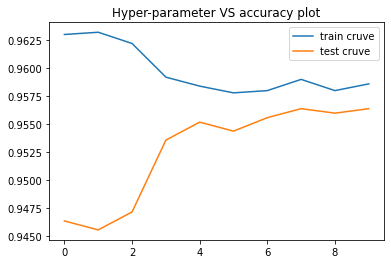

In [10]:
plt.plot(trainscores, label='train cruve')
plt.plot(testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.show()

In [0]:
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

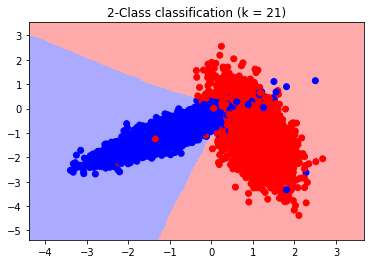

In [12]:
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 21)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)